In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
anime = pd.read_csv('Anime_data.csv', encoding='latin')

print('anime (shape):', anime.shape)
anime.head()

anime (shape): (17002, 15)


,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bountyâsuch is the life...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"['Action', 'Magic', 'Police', 'Supernatural', ...",Witches are individuals with special powers li...,TV,['Bandai Visual'],['Sunrise'],7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",It is the dark century and the people are suff...,TV,NaN,['Toei Animation'],7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


In [3]:
display(anime[['Title', 'Rating', 'Producer', 'Studio']].loc[anime['Type'] == 'Movie'])

,Title,Rating,Producer,Studio
1,Cowboy Bebop: Tengoku no Tobira,8.41,"['Sunrise', 'Bandai Visual']",['Bones']
22,Neon Genesis Evangelion: Death & Rebirth,7.50,"['Movic', 'Sega', 'TV Tokyo Music', 'Audio Tan...","['Gainax', 'Production I.G']"
23,Neon Genesis Evangelion: The End of Evangelion,8.48,"['TV Tokyo', 'Toei Animation', 'Kadokawa Shote...","['Gainax', 'Production I.G']"
25,Koukaku Kidoutai,8.35,"['Bandai Visual', 'Kodansha']",['Production I.G']
28,Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...,7.63,"['Fuji TV', 'Sony Music Entertainment']",['Studio Gallop']
...,...,...,...,...
16978,UFO Robo Grendizer: Akai Yuuhi no Taiketsu,6.70,NaN,NaN
16980,Mazinger Z tai Dr. Hell,6.53,NaN,NaN
16985,Gegege no Kitarou: Chisougan,6.34,NaN,NaN
16986,Getter Robo (Movie),6.08,NaN,NaN


In [4]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    text = re.sub(r'Â°', '',text)
    
    return text

anime['Title'] = anime['Title'].apply(text_cleaning)


In [5]:
anime.isnull().sum()

Anime_id         0
Title            0
Genre         2012
Synopsis      1419
Type           634
Producer      9367
Studio        9083
Rating        2577
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
dtype: int64

In [6]:
anime.describe()

,Anime_id,Rating,ScoredBy,Popularity,Members,Episodes
count,17002.000000,14425.000000,1.322700e+04,16368.000000,1.700200e+04,14085.000000
mean,20446.579638,6.287867,1.139084e+04,8131.919599,2.038130e+04,11.482712
std,14342.513259,1.141401,4.328434e+04,4714.683351,7.121404e+04,44.089040
min,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000
25%,5581.500000,5.620000,4.300000e+01,4042.500000,1.450000e+02,1.000000
50%,21334.000000,6.410000,4.780000e+02,8115.000000,1.113000e+03,1.000000
75%,34789.250000,7.090000,3.831000e+03,12208.250000,7.855750e+03,12.000000
max,40960.000000,10.000000,1.006242e+06,16338.000000,1.451708e+06,1818.000000


IMDB's weighted rating (WR) which is given as :

WR = (v/(v+m)R) + (m/(v+m)C)

where, v is the number of votes for the movie; m is the minimum votes required to be listed in the chart; R is the average rating of the movie; And C is the mean vote across the whole report

In [7]:
C = anime['Rating'].mean()
C

6.287866897746967

In [8]:
anime['ScoredBy'].describe()

count    1.322700e+04
mean     1.139084e+04
std      4.328434e+04
min      1.000000e+00
25%      4.300000e+01
50%      4.780000e+02
75%      3.831000e+03
max      1.006242e+06
Name: ScoredBy, dtype: float64

In [9]:
m = anime['ScoredBy'].quantile(0.85)
m

12407.400000000009

In [10]:
q_animes = anime.copy().loc[anime['ScoredBy'] >= m]
q_animes.shape

(1984, 15)

In [11]:
def weighted_rating(x, m=m, C=C):
    v = x['ScoredBy']
    R = x['Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
q_animes['Score'] = q_animes.apply(weighted_rating, axis=1)

In [13]:
q_animes = q_animes.sort_values('Score', ascending=False)
q_animes[['Title', 'ScoredBy', 'Rating', 'Score']].head(15)

,Title,ScoredBy,Rating,Score
3634,Fullmetal Alchemist Brotherhood,730784.0,9.25,9.200548
10110,Kimi no Na wa,467437.0,9.19,9.114959
5031,SteinsGate,561405.0,9.14,9.078329
5725,Hunter x Hunter 2011,400879.0,9.11,9.025276
8695,Koe no Katachi,293169.0,9.04,8.928254
3263,Clannad After Story,362434.0,9.01,8.919896
2461,Code Geass Hangyaku no Lelouch R2,541989.0,8.95,8.890421
183,Sen to Chihiro no Kamikakushi,496902.0,8.92,8.855878
7747,Shigatsu wa Kimi no Uso,411504.0,8.88,8.804131
10432,Haikyuu Karasuno Koukou vs Shiratorizawa Gakue...,157302.0,8.99,8.792448


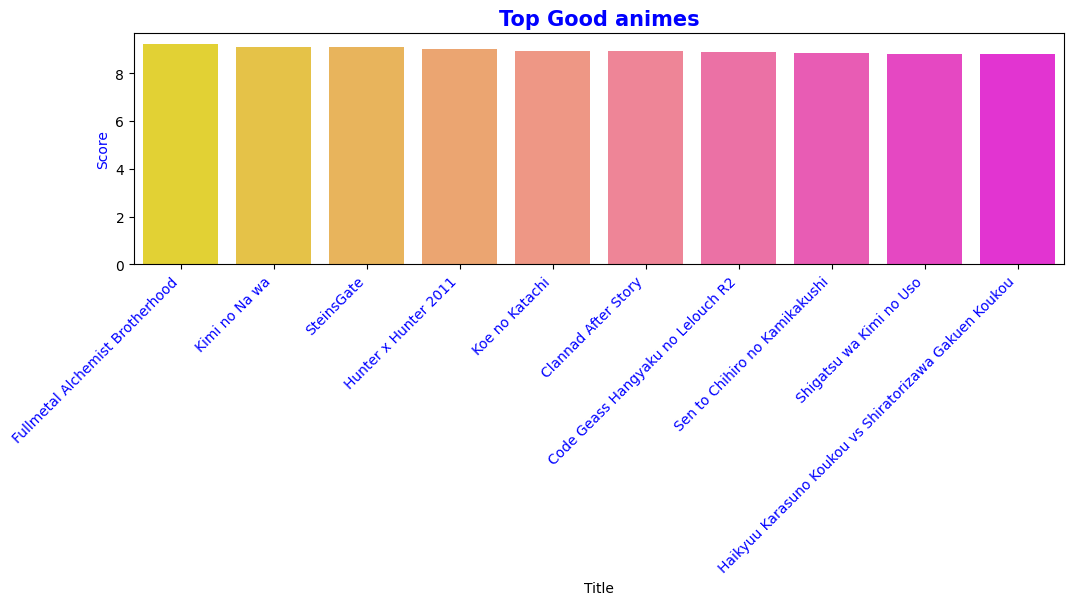

In [19]:
plt.figure(figsize=(12, 3), dpi=100)


best_score = q_animes.sort_values(by=['Score'], ascending=False)[:10]


# g = sns.barplot(best_score["Title"], best_score['Score'], palette="spring_r")
g = sns.barplot(x="Title", y="Score", data=best_score, hue="Title", dodge=False, palette="spring_r", legend=False)
plt.ylabel("Score", color = 'b')
plt.xticks(rotation=45, horizontalalignment='right', color = 'b')
plt.title('Top Good animes', fontweight='bold', fontsize=15, color = 'b')
plt.show()

In [20]:
best_scores = best_score[['Score','Title','Genre', 'Studio', 'Type']].set_index('Title')
display(best_scores)

,Score,Genre,Studio,Type
Title,,,,
Fullmetal Alchemist Brotherhood,9.200548,"['Action', 'Military', 'Adventure', 'Comedy', ...",['Bones'],TV
Kimi no Na wa,9.114959,"['Supernatural', 'Drama', 'Romance', 'School']",['CoMix Wave Films'],Movie
SteinsGate,9.078329,"['Thriller', 'Sci-Fi']",['White Fox'],TV
Hunter x Hunter 2011,9.025276,"['Action', 'Adventure', 'Super Power', 'Shounen']",['Madhouse'],TV
Koe no Katachi,8.928254,"['Drama', 'School', 'Shounen']",['Kyoto Animation'],Movie
Clannad After Story,8.919896,"['Slice of Life', 'Comedy', 'Supernatural', 'D...",['Kyoto Animation'],TV
Code Geass Hangyaku no Lelouch R2,8.890421,"['Action', 'Military', 'Sci-Fi', 'Super Power'...",['Sunrise'],TV
Sen to Chihiro no Kamikakushi,8.855878,"['Adventure', 'Supernatural', 'Drama']",['Studio Ghibli'],Movie
Shigatsu wa Kimi no Uso,8.804131,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",['A-1 Pictures'],TV


## Recommendation System

### (1) Content Based filtering

In [21]:
anime['Synopsis'].isnull().sum()

1419

In [22]:
anime['Synopsis'] = anime['Synopsis'].fillna('')

### Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each Synopsis.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(anime['Synopsis'])

tfidf_matrix.shape

(17002, 45350)

In [24]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.22691949, 0.02116274, ..., 0.        , 0.        ,
        0.        ],
       [0.22691949, 1.        , 0.03335443, ..., 0.        , 0.        ,
        0.        ],
       [0.02116274, 0.03335443, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
indices = pd.Series(anime.index, index=anime['Title']).drop_duplicates()
indices

Title
Cowboy Bebop                                         0
Cowboy Bebop Tengoku no Tobira                       1
Trigun                                               2
Witch Hunter Robin                                   3
Bouken Ou Beet                                       4
                                                 ...  
Sore Ike Anpanman Anpanman to Kaizoku Lobster    16997
X Bomber                                         16998
X Bomber Pilot                                   16999
Gankochan                                        17000
Original CVP Momoko                              17001
Length: 17002, dtype: int64

In [26]:
def get_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 15 most similar movies
    sim_scores = sim_scores[1:16]
    
    movie_indices = [i[0] for i in sim_scores]

    return anime['Title'].iloc[movie_indices]

In [27]:
get_recommendations('Sen to Chihiro no Kamikakushi')

10061                                Shounen Maid
16592                                    Sankarea
570                            Kujibiki Unbalance
4622                          Suki Desu Suzukikun
5653        Kami nomi zo Shiru Sekai 4nin to Idol
3348                  KerakuNoOH King of Pleasure
10666                         Kushimitama Samurai
6011                                 Sankarea OVA
2472                        ef A Tale of Memories
2874                                    Kiss yori
4284         ef A Tale of Memories  Recollections
752                                    Jyu Oh Sei
15714                          Cinnamon no Parade
15170    Naruto Shippuuden Movie 6  Road to Ninja
12846                              Mirai no Mirai
Name: Title, dtype: object

In [28]:
get_recommendations('Koe no Katachi')

13934    Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...
1272                                      Asatte no Houkou
5739                                          Hero Herokun
1756                                                  Pops
9572                                     Yuujou no Kickoff
6659                                          Danchi Tomoo
4837                        Fortune Arterial Akai Yakusoku
6786                         Kakumeiki Valvrave 2nd Season
14565                               Tomo Tabidachi no Toki
16431                                    Momons Sand Witch
9375                         Gakuen Handsome The Animation
10688                                      Gakuen Handsome
6646                                        Harisu no Kaze
13293                    Hitoribocchi no Marumaru Seikatsu
11405                                           Tejina Shi
Name: Title, dtype: object

Genres, Producer and Studio Based Recommender
It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the producer, related genres and the studio.

In [29]:
anime.head(2)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bountyâsuch is the life...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...


In [30]:
features = ['Genre','Producer', 'Studio']

print(anime[features].isnull().sum())

Genre       2012
Producer    9367
Studio      9083
dtype: int64


In [31]:
anime[features] = anime[features].fillna('[' ']')

In [32]:
from ast import literal_eval

for feature in features:
    anime[feature] = anime[feature].apply(literal_eval)

In [33]:
anime.Type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown', nan],
      dtype=object)

In [34]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ","")) for i in x]
    
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ",""))
        else:
            return ""

In [35]:
features = ['Genre','Producer', 'Studio', 'Type']

for feature in features:
    anime[feature] = anime[feature].apply(clean_data)

In [36]:
anime.head(2)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"[action, adventure, comedy, drama, sci-fi, space]","In the year 2071, humanity has colonized sever...",tv,[bandaivisual],[sunrise],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"[action, space, drama, mystery, sci-fi]","Another day, another bountyâsuch is the life...",movie,"[sunrise, bandaivisual]",[bones],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...


In [37]:
features

['Genre', 'Producer', 'Studio', 'Type']

In [38]:
def create_soup(x):
    return " ".join(x['Genre']) + " " + x['Type'] + " " + " ".join(x['Producer']) + " " + " ".join(x['Studio']) + " " + x['Synopsis'] + " " + " ".join(x['Studio']) 

In [39]:
anime['soup'] = anime.apply(create_soup, axis=1)

In [40]:
anime['soup']

0        action adventure comedy drama sci-fi space tv ...
1        action space drama mystery sci-fi movie sunris...
2        action sci-fi adventure comedy drama shounen t...
3        action magic police supernatural drama mystery...
4        adventure fantasy shounen supernatural tv  toe...
                               ...                        
16997                                          special    
16998                                               tv    
16999                                          special    
17000                                                     
17001                                              ova    
Name: soup, Length: 17002, dtype: object

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an producer if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(anime['soup'])

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [42]:
anime = anime.reset_index()
indices = pd.Series(anime.index, index=anime['Title'])

In [43]:
indices

Title
Cowboy Bebop                                         0
Cowboy Bebop Tengoku no Tobira                       1
Trigun                                               2
Witch Hunter Robin                                   3
Bouken Ou Beet                                       4
                                                 ...  
Sore Ike Anpanman Anpanman to Kaizoku Lobster    16997
X Bomber                                         16998
X Bomber Pilot                                   16999
Gankochan                                        17000
Original CVP Momoko                              17001
Length: 17002, dtype: int64

In [44]:
get_recommendations('Cowboy Bebop', cosine_sim2)

5616                                Planetes Picture Drama
1                           Cowboy Bebop Tengoku no Tobira
13882                                       Top wo Nerae 3
14549                                New HyakujuuOu GoLion
13166                                              Ladyspo
13130                                           Zoids Wild
2318          Ginga Tetsudou Monogatari Eien e no Bunkiten
11099                                    Making of Lensman
5075                  Ginga Hyouryuu Vifam Atsumatta 13nin
5081                  Shin Mashin Eiyuuden Wataru Majinzan
3289                                  Ginga Senpuu Braiger
10413    Mobile Suit Gundam 0083 Stardust Memory Pictur...
13902                                          Yusei Kamen
4173                   Sora wo Kakeru Shoujo Picture Drama
13593                           Voltron Legendary Defender
Name: Title, dtype: object

In [45]:
get_recommendations('Sen to Chihiro no Kamikakushi', cosine_sim2)

15170           Naruto Shippuuden Movie 6  Road to Ninja
752                                           Jyu Oh Sei
12846                                     Mirai no Mirai
10061                                       Shounen Maid
4635                             Karigurashi no Arrietty
10666                                Kushimitama Samurai
2727                                      Hatenkou Yuugi
16592                                           Sankarea
7619     Kero Kero Keroppi no Yowamushiouji no Daibouken
10040                                    Kemushi no Boro
6610           Ashita Genki ni Nare Hanbun no Satsumaimo
15144                   Kino no Tabi The Beautiful World
5420                                Da Yu Hai Tang Movie
6263                      Majokko Shimai no Yoyo to Nene
1017              Fushigi no Umi no Nadia Original Movie
Name: Title, dtype: object

In [46]:
get_recommendations('Mirai no Mirai', cosine_sim2)

3545                             Umineko no Naku Koro ni
3889                                   Suteneko Torachan
2319                                       Umi no Triton
4320                           Doubutsu Mura no Daisodou
9944                    Tenchi Muyou Ryououki 4th Season
12024                                        Yao Shen Ji
5237                                               Oshin
6703                                         Golden Time
5905                        Ookami Kodomo no Ame to Yuki
6180                           Kono Sekai no Katasumi ni
305                            Mama wa Shougaku 4 Nensei
13450      Sayonara no Asa ni Yakusoku no Hana o KazarÅ
8728                                           Hand Soap
6526                                 Dareka no Manazashi
8653     Kyoukai no Kanata Movie 2 Ill Be Here  Miraihen
Name: Title, dtype: object

In [47]:
display(anime[['Title', 'Rating', 'Producer', 'Studio']].loc[anime['Title'] == 'Sen to Chihiro no Kamikakushi'])

,Title,Rating,Producer,Studio
183,Sen to Chihiro no Kamikakushi,8.92,[toho],[studioghibli]


### (2) Collaborative filtering using k-Nearest Neighbors (kNN)

In [50]:
rating = pd.read_csv('rating.csv', encoding='latin')

print('rating (shape):', rating.shape)

rating.head(5)

rating (shape): (7813737, 3)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [51]:
print('anime (shape):', anime.shape)

anime.head(2)

anime (shape): (17002, 17)


,index,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link,soup
0,0,1,Cowboy Bebop,"[action, adventure, comedy, drama, sci-fi, space]","In the year 2071, humanity has colonized sever...",tv,[bandaivisual],[sunrise],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop,action adventure comedy drama sci-fi space tv ...
1,1,5,Cowboy Bebop Tengoku no Tobira,"[action, space, drama, mystery, sci-fi]","Another day, another bountyâsuch is the life...",movie,"[sunrise, bandaivisual]",[bones],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...,action space drama mystery sci-fi movie sunris...


In [52]:
rating.columns = ['User_id', 'Anime_id', 'Rating']

anime.isnull().sum()

index            0
Anime_id         0
Title            0
Genre            0
Synopsis         0
Type             0
Producer         0
Studio           0
Rating        2577
ScoredBy      3775
Popularity     634
Members          0
Episodes      2917
Source        1927
Aired          634
Link           634
soup             0
dtype: int64

In [53]:
anime.fillna({'Rating':0}, inplace=True)

Remove anime with low count of ratings and users who gave low count of ratings

In [54]:
anime_rating = rating.groupby(by = 'Anime_id').count()
anime_rating = anime_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})
anime_rating

,Anime_id,Rating_count
0,1,15509
1,5,6927
2,6,11077
3,7,2629
4,8,413
...,...,...
11195,34367,5
11196,34412,1
11197,34475,4
11198,34476,1


In [55]:
anime_rating['Rating_count'].describe()

count    11200.000000
mean       697.655089
std       2028.627749
min          1.000000
25%          5.000000
50%         51.500000
75%        385.250000
max      39340.000000
Name: Rating_count, dtype: float64

In [56]:
final_anime = anime_rating[anime_rating['Rating_count']>50]
final_anime.shape

(5625, 2)

In [57]:
user_rating = rating.groupby(by='User_id').count()
user_rating = user_rating['Rating'].reset_index().rename(columns={'Rating':'Rating_count'})
user_rating

,User_id,Rating_count
0,1,153
1,2,3
2,3,94
3,4,52
4,5,467
...,...,...
73510,73512,13
73511,73513,33
73512,73514,1
73513,73515,196


In [58]:
user_rating['Rating_count'].describe()

count    73515.000000
mean       106.287656
std        153.086558
min          1.000000
25%         18.000000
50%         57.000000
75%        136.000000
max      10227.000000
Name: Rating_count, dtype: float64

In [59]:
final_user = user_rating[user_rating['Rating_count']>80]
final_user.shape

(29368, 2)

Lets create dataset with popular anime and high rating counts from users

In [60]:
final_anime_dt = rating[rating['Anime_id'].isin(final_anime['Anime_id'])]
final_dt = final_anime_dt[final_anime_dt['User_id'].isin(final_user['User_id'])]
final_dt.head()

,User_id,Anime_id,Rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


### Construct Rating Matrix
We will construct a matrix wherein Anime id will be indexes and User id in columns and then Convert rating matrix to csr matrix to save memory

In [61]:
rating_matrix = final_dt.pivot_table(index='Anime_id',columns='User_id',values='Rating').fillna(0)

print(rating_matrix.shape)
rating_matrix.head()

(5625, 29368)


User_id,1,3,5,7,11,13,14,17,21,29,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
Anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,...,0.0,10.0,9.0,0.0,0.0,9.0,10.0,9.0,0.0,10.0
5,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,...,0.0,8.0,0.0,0.0,0.0,7.0,10.0,8.0,0.0,10.0
6,0.0,0.0,8.0,0.0,0.0,-1.0,0.0,7.0,0.0,0.0,...,9.0,-1.0,9.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from scipy.sparse import csr_matrix
csr_rating_matrix =  csr_matrix(rating_matrix.values)

print(csr_rating_matrix)

  (0, 5)	-1.0
  (0, 8)	9.0
  (0, 11)	7.0
  (0, 16)	10.0
  (0, 18)	10.0
  (0, 20)	10.0
  (0, 21)	10.0
  (0, 22)	-1.0
  (0, 29)	10.0
  (0, 30)	8.0
  (0, 46)	9.0
  (0, 49)	10.0
  (0, 53)	10.0
  (0, 56)	9.0
  (0, 57)	8.0
  (0, 60)	7.0
  (0, 63)	7.0
  (0, 65)	8.0
  (0, 69)	10.0
  (0, 71)	9.0
  (0, 72)	8.0
  (0, 73)	10.0
  (0, 76)	9.0
  (0, 77)	8.0
  (0, 78)	9.0
  :	:
  (5624, 28977)	-1.0
  (5624, 28992)	10.0
  (5624, 29022)	-1.0
  (5624, 29027)	10.0
  (5624, 29035)	8.0
  (5624, 29037)	-1.0
  (5624, 29049)	8.0
  (5624, 29073)	-1.0
  (5624, 29076)	8.0
  (5624, 29079)	8.0
  (5624, 29094)	-1.0
  (5624, 29104)	9.0
  (5624, 29114)	8.0
  (5624, 29128)	7.0
  (5624, 29129)	8.0
  (5624, 29131)	-1.0
  (5624, 29140)	9.0
  (5624, 29157)	-1.0
  (5624, 29215)	8.0
  (5624, 29221)	-1.0
  (5624, 29234)	8.0
  (5624, 29258)	10.0
  (5624, 29264)	8.0
  (5624, 29292)	9.0
  (5624, 29317)	9.0


### Fit the matrix into k-Nearest Neighbors (kNN)
We will also use cosine similarity as the metric for the algorithm.

In [63]:
from sklearn.neighbors import NearestNeighbors

recommender = NearestNeighbors(metric='cosine')

recommender.fit(csr_rating_matrix)

NearestNeighbors(metric='cosine')

In [64]:
user_anime = anime[anime['Title']=='Sen to Chihiro no Kamikakushi']
user_anime

,index,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link,soup
183,183,199,Sen to Chihiro no Kamikakushi,"[adventure, supernatural, drama]","Stubborn, spoiled, and naÃ¯ve, 10-year-old Chi...",movie,[toho],[studioghibli],8.92,496902.0,40.0,703229.0,1.0,Original,"Jul 20, 2001",https://myanimelist.net/anime/199/Sen_to_Chihi...,adventure supernatural drama movie toho studio...


In [65]:
user_anime_index = np.where(rating_matrix.index==int(user_anime['Anime_id']))[0][0]

# this index is from rating matrix not from the anime dataset!

print('rating natrix index:', user_anime_index)

# getting the ratings based on the index

user_anime_ratings = rating_matrix.iloc[user_anime_index]
user_anime_ratings

rating natrix index: 173


C:\Users\Aditee\AppData\Local\Temp\ipykernel_12216\3878382244.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  user_anime_index = np.where(rating_matrix.index==int(user_anime['Anime_id']))[0][0]


User_id
1         0.0
3        10.0
5         8.0
7         0.0
11       10.0
         ... 
73503     8.0
73504     8.0
73507    10.0
73510    -1.0
73515     0.0
Name: 199, Length: 29368, dtype: float64

In [66]:
# now we need to convert this into 2d array (with only 1 row)

user_anime_ratings_reshaped = user_anime_ratings.values.reshape(1,-1)
user_anime_ratings_reshaped

array([[ 0., 10.,  8., ..., 10., -1.,  0.]])

In [67]:
# the ratings will be plotted and will return 11 indices and distances of nearest neighbors
distances, indices = recommender.kneighbors(user_anime_ratings_reshaped,n_neighbors=16)

print(distances)

[[0.         0.26155118 0.30075682 0.35429596 0.41723165 0.41745461
  0.45026117 0.45202544 0.47006025 0.47340618 0.47559998 0.47617122
  0.48209854 0.48600216 0.48878719 0.49086589]]


In [68]:
print(indices)

[[ 173  394  140  480 1316 1799  469  470 1431   98 1349  527  199  740
    18 4444]]


In [69]:
# the returned indices will be used to get anime id(index) on rating matrix, 
# excluding the first element since the first nearest neighbor is itself

nearest_neighbors_indices = rating_matrix.iloc[indices[0]].index[1:]

In [70]:
nearest_neighbors = pd.DataFrame({'Anime_id': nearest_neighbors_indices})
pd.merge(nearest_neighbors,anime,on='Anime_id',how='left')

,Anime_id,index,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link,soup
0,431,379,Howl no Ugoku Shiro,"[adventure, drama, fantasy, romance]","That jumbled piece of architecture, that cacop...",movie,"[d-rights, tokumashoten]",[studioghibli],8.73,333104.0,88.0,479791.0,1.0,Novel,"Nov 20, 2004",https://myanimelist.net/anime/431/Howl_no_Ugok...,adventure drama fantasy romance movie d-rights...
1,164,149,Mononoke Hime,"[action, adventure, fantasy]",When an Emishi village is attacked by a fierce...,movie,"[tokumashoten, nippontelevisionnetwork]",[studioghibli],8.80,332946.0,77.0,506368.0,1.0,Original,"Jul 12, 1997",https://myanimelist.net/anime/164/Mononoke_Hime,action adventure fantasy movie tokumashoten ni...
2,523,441,Tonari no Totoro,"[adventure, comedy, supernatural]","In 1950s Japan, Tatsuo Kusakabe relocates hims...",movie,[studiofantasia],[studioghibli],8.45,261626.0,120.0,403817.0,1.0,Original,"Apr 16, 1988",https://myanimelist.net/anime/523/Tonari_no_To...,adventure comedy supernatural movie studiofant...
3,1535,1257,Death Note,"[mystery, police, psychological, supernatural,...","A shinigami, as a god of death, can kill any p...",tv,"[vap, konami, ashiproduction, nippontelevision...",[madhouse],8.67,1006242.0,1.0,1451708.0,37.0,Manga,"Oct 4, 2006 to Jun 27, 2007",https://myanimelist.net/anime/1535/Death_Note,mystery police psychological supernatural thri...
4,2236,1892,Toki wo Kakeru Shoujo,"[sci-fi, adventure, drama, romance]",Makoto Konno is in her last year of high schoo...,movie,"[kadokawashoten, bandai, memory-tech, happinet...",[madhouse],8.35,248870.0,130.0,410159.0,1.0,Novel,"Jul 15, 2006",https://myanimelist.net/anime/2236/Toki_wo_Kak...,sci-fi adventure drama romance movie kadokawas...
5,512,434,Majo no Takkyuubin,"[adventure, comedy, drama, magic, romance, fan...","Kiki, a 13-year-old witch-in-training, must sp...",movie,[],"[studioghibli, studiohibari]",8.29,139453.0,361.0,214986.0,1.0,Novel,"Jul 29, 1989",https://myanimelist.net/anime/512/Majo_no_Takk...,adventure comedy drama magic romance fantasy m...
6,513,15143,Tenkuu no Shiro Laputa,[],"In a world filled with planes and airships, Sh...",movie,[],[],8.38,NaN,387.0,255742.0,NaN,NaN,"Aug 2, 1986",https://myanimelist.net/anime/513/Tenkuu_no_Sh...,movie In a world filled with planes and air...
7,1689,1394,Byousoku 5 Centimeter,"[drama, romance, sliceoflife]","Takaki Toono and Akari Shinohara, two very clo...",movie,[],[comixwavefilms],7.95,280263.0,108.0,456478.0,3.0,Original,"Mar 3, 2007",https://myanimelist.net/anime/1689/Byousoku_5_...,drama romance sliceoflife movie comixwavefilm...
8,121,105,Fullmetal Alchemist,"[action, adventure, comedy, drama, fantasy, ma...","Edward Elric, a young, brilliant alchemist, ha...",tv,"[aniplex, dentsu, squareenix, mainichibroadcas...",[bones],8.29,490243.0,37.0,789593.0,51.0,Manga,"Oct 4, 2003 to Oct 2, 2004",https://myanimelist.net/anime/121/Fullmetal_Al...,action adventure comedy drama fantasy magic mi...
9,1575,1292,Code Geass Hangyaku no Lelouch,"[action, military, sci-fi, superpower, drama, ...","In the year 2010, the Holy Empire of Britannia...",tv,"[bandaivisual, mainichibroadcastingsystem, ban...",[sunrise],8.79,625466.0,11.0,983674.0,25.0,Original,"Oct 6, 2006 to Jul 29, 2007",https://myanimelist.net/anime/1575/Code_Geass_...,action military sci-fi superpower drama mecha ...
